# SQLite Workshop

### Load Libraries

In [60]:
import sqlite3
import pandas as pd

### Load GitHub repo

In [61]:
%cd /content/
%rm -r ./2022TeamBDataEngineeringBC
!git clone https://github.com/Fuenfgeld/2022TeamBDataEngineeringBC.git
%cd ./2022TeamBDataEngineeringBC/

[WinError 2] Das System kann die angegebene Datei nicht finden: '/content/'
c:\Users\jungc\Desktop\2022TeamBDataEngineeringBC


UsageError: Line magic function `%rm` not found.


### Connect to Database

In [62]:
conn = sqlite3.connect('sqlite_workshop.db')
cursor = conn.cursor()
print("Opened database successfully");

Opened database successfully


### Delete tales if exists

In [63]:
cursor.execute("DROP TABLE IF EXISTS food")
cursor.execute("DROP TABLE IF EXISTS orders")
cursor.execute("DROP TABLE IF EXISTS animals")
cursor.execute("DROP TABLE IF EXISTS customer")
#cursor.execute("DROP TABLE IF EXISTS producer")
cursor.execute("DROP TABLE IF EXISTS customer_buys_food")
cursor.execute("DROP TABLE IF EXISTS employee")
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("DROP TABLE IF EXISTS food_new")
cursor.execute("DROP TABLE IF EXISTS customer_new")
cursor.execute("DROP TABLE IF EXISTS employee_new")
#cursor.execute("DROP TABLE IF EXISTS employee_sells_to_customer")

### Load CSVs into Dataframe

In [64]:
food = pd.read_csv('tables/initial_tables/Futter.csv', sep=";")
customer = pd.read_csv('tables/initial_tables/Kunden.csv', sep=";")
animals = pd.read_csv('tables/initial_tables/Tiere.csv', sep=";")
orders = pd.read_csv('tables/initial_tables/Order.csv', sep=";")
employee = pd.read_csv('tables/initial_tables/Verkaeufer.csv', sep=";")
customer_buys_food = pd.read_csv('tables/initial_tables/Customer_buys_Food.csv', sep=";")

### Create Tables

In [65]:
cursor.execute('''
		CREATE TABLE IF NOT EXISTS customer (
			customer_ID int primary key,
            name nvarchar(50),
			postal_code nvarchar(5),
			city nvarchar(50)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS employee (
			employee_ID int primary key,
            name nvarchar(50),
            gender nvarchar(1),
			wage int
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS food (
			food_ID int primary key,
            name nvarchar(50),
			price_per_kg float,
            producer nvarchar(50),
            origin nvarchar(50)
			)
               ''')

cursor.execute('''
		CREATE TABLE IF NOT EXISTS animals (
            name nvarchar(50) primary key,
			food int,
			foreign key(food) references food(food_ID)
			)
               ''') 
cursor.execute('''
		CREATE TABLE IF NOT EXISTS orders (
            order_Nr int primary key,
            date Date,
            transact int
			)
               ''')


cursor.execute('''
		CREATE TABLE IF NOT EXISTS customer_buys_food (
            C_ID int,
            F_ID int,
			amount int,
            O_ID int,
            E_ID int,
            foreign key(C_ID) references customer(customer_ID)
			foreign key(F_ID) references food(food_ID)
            foreign key(O_ID) references orders(order_Nr)
            foreign key(E_ID) references employee(employee_ID)
			)
               ''') 

### Insert Dataframe in Table

In [66]:
customer.to_sql('customer', conn, if_exists='append', index=False)
animals.to_sql('animals', conn, if_exists='append', index=False)
food.to_sql('food', conn, if_exists='append', index=False)
orders.to_sql('orders', conn, if_exists='append', index=False)
employee.to_sql('employee', conn, if_exists='append', index=False)
customer_buys_food.to_sql('customer_buys_food', conn, if_exists='append', index=False)

12

### Output table contents

In [67]:
print(pd.read_sql_query("SELECT * FROM customer", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("SELECT * FROM food", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("SELECT * FROM animals", conn))

   customer_ID       name postal_code          city
0            1    Mueller       68723    Oftersheim
1            2    Schmidt       68766    Hockenheim
2            3  Schneider       68526     Ladenburg
3            4    Fischer       68753     Waghäusel
4            5      Weber       68799     Reilingen
5            6      Meyer       68549     Ilvesheim
6            7     Wagner       69221    Dossenheim
7            8     Becker       69251       Gaiberg
8            9     Schulz       69151  Neckargemünd
9           10   Hoffmann       68526     Ladenburg
--------------------------------------------------------
   food_ID              name  price_per_kg          producer       origin
0        1       Hundefutter          4.00   Wau Dosenfutter  Deutschland
1        2      Katzenfutter          8.00  Miau Dosenfutter        China
2        3  Getreidemischung         10.00  Jerry's Getreide  Deutschland
3        4      Pferdefutter          0.65          Hottehue       Taiwan
4

In [68]:
print(pd.read_sql_query("SELECT * FROM orders", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("SELECT * FROM employee", conn))
print("--------------------------------------------------------")
print("Tab customer_buys_food")
print(pd.read_sql_query("SELECT * FROM customer_buys_food", conn))
print("--------------------------------------------------------")

    order_Nr        date  transact
0          1  2021-04-22         2
1          2  2021-04-25         1
2          3  2021-05-03         1
3          4  2021-06-06         3
4          5  2021-07-22         7
5          6  2021-10-23         4
6          7  2022-01-20         5
7          8  2022-02-15         5
8          9  2022-03-21         3
9         10  2022-03-22         6
10        11  2022-03-23         6
11        12  2022-03-23         3
--------------------------------------------------------
   employee_ID       name gender  wage
0            1   Schaefer      w  1000
1            2      Bauer      m  1200
2            3       Koch      w  2500
3            4    Richter      m  3000
4            5      Klein      m  1750
5            6       Wolf      m  2200
6            7  Schroeder      w  1750
7            8    Neumann      w  1200
8            9    Schwarz      w  1000
9           10      Braun      w  2000
--------------------------------------------------------
Ta

### Output Table Info


In [69]:
print(pd.read_sql_query("PRAGMA table_info('orders')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('food')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('animals')", conn))

   cid      name  type  notnull dflt_value  pk
0    0  order_Nr   int        0       None   1
1    1      date  Date        0       None   0
2    2  transact   int        0       None   0
--------------------------------------------------------
   cid          name          type  notnull dflt_value  pk
0    0       food_ID           int        0       None   1
1    1          name  nvarchar(50)        0       None   0
2    2  price_per_kg         float        0       None   0
3    3      producer  nvarchar(50)        0       None   0
4    4        origin  nvarchar(50)        0       None   0
--------------------------------------------------------
   cid  name          type  notnull dflt_value  pk
0    0  name  nvarchar(50)        0       None   1
1    1  food           int        0       None   0


In [70]:
print(pd.read_sql_query("PRAGMA table_info('customer')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('customer_buys_food')", conn))
print("--------------------------------------------------------")
print(pd.read_sql_query("PRAGMA table_info('employee')", conn))

   cid         name          type  notnull dflt_value  pk
0    0  customer_ID           int        0       None   1
1    1         name  nvarchar(50)        0       None   0
2    2  postal_code   nvarchar(5)        0       None   0
3    3         city  nvarchar(50)        0       None   0
--------------------------------------------------------
   cid    name type  notnull dflt_value  pk
0    0    C_ID  int        0       None   0
1    1    F_ID  int        0       None   0
2    2  amount  int        0       None   0
3    3    O_ID  int        0       None   0
4    4    E_ID  int        0       None   0
--------------------------------------------------------
   cid         name          type  notnull dflt_value  pk
0    0  employee_ID           int        0       None   1
1    1         name  nvarchar(50)        0       None   0
2    2       gender   nvarchar(1)        0       None   0
3    3         wage           int        0       None   0


### Get foreign keys
Emtpy DataFrame means there are no foreign keys

Orders table

In [71]:
print(pd.read_sql_query("PRAGMA foreign_key_list('orders')", conn))

Empty DataFrame
Columns: [id, seq, table, from, to, on_update, on_delete, match]
Index: []


Food table

In [72]:
print(pd.read_sql_query("PRAGMA foreign_key_list('food')", conn))

Empty DataFrame
Columns: [id, seq, table, from, to, on_update, on_delete, match]
Index: []


Animals table

In [73]:
print(pd.read_sql_query("PRAGMA foreign_key_list('Animals')", conn))

   id  seq table  from       to  on_update  on_delete match
0   0    0  food  food  food_ID  NO ACTION  NO ACTION  NONE


Customer Table

In [74]:
print(pd.read_sql_query("PRAGMA foreign_key_list('customer')", conn))

Empty DataFrame
Columns: [id, seq, table, from, to, on_update, on_delete, match]
Index: []


Customer_buys_food table

In [75]:
print(pd.read_sql_query("PRAGMA foreign_key_list('customer_buys_food')", conn))

   id  seq     table  from           to  on_update  on_delete match
0   0    0  employee  E_ID  employee_ID  NO ACTION  NO ACTION  NONE
1   1    0    orders  O_ID     order_Nr  NO ACTION  NO ACTION  NONE
2   2    0      food  F_ID      food_ID  NO ACTION  NO ACTION  NONE
3   3    0  customer  C_ID  customer_ID  NO ACTION  NO ACTION  NONE


Employee_sells_to_customer table

In [76]:
print(pd.read_sql_query("PRAGMA foreign_key_list('employee_sells_to_customer')", conn))

Empty DataFrame
Columns: [id, seq, table, from, to, on_update, on_delete, match]
Index: []


Employee table

In [77]:
print(pd.read_sql_query("PRAGMA foreign_key_list('employee')", conn))

Empty DataFrame
Columns: [id, seq, table, from, to, on_update, on_delete, match]
Index: []


### INNER JOIN

SQLite INNER JOIN gibt die Datensätze zurück, bei denen sich tabel1 und tabel2 überschneiden.

In [78]:
print(pd.read_sql_query('''
SELECT animals.name,food.name as f_name FROM animals 
        INNER JOIN food ON animals.food = food.food_ID''', conn))

        name            f_name
0       Hund       Hundefutter
1      Katze      Katzenfutter
2   Nagetier  Getreidemischung
3  Hauspferd      Pferdefutter
4  Goldfisch       Fischfutter


###  LEFT JOIN

SQLite LEFT OUTER JOIN gibt alle Datensätze aus tabele1 und nur die Datensätze aus tabele2 zurück, die sich mit Tabelle1 überschneiden.

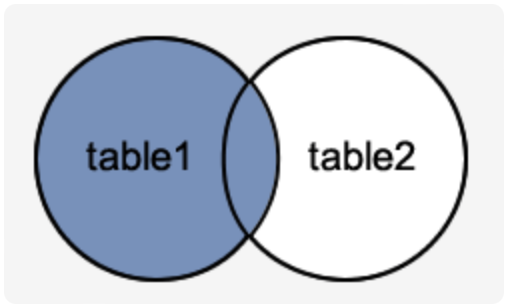

In [79]:
print(pd.read_sql_query('''
    SELECT customer.name, customer_buys_food.amount FROM customer
    LEFT JOIN customer_buys_food ON customer.customer_ID = customer_buys_food.C_ID''', conn
    ))

         name  amount
0     Mueller       5
1     Schmidt       2
2     Schmidt       2
3   Schneider       3
4   Schneider       6
5     Fischer       5
6       Weber       2
7       Meyer       1
8      Wagner       3
9      Becker       1
10     Schulz       2
11   Hoffmann       2


###  MULTIPLE JOIN

In [90]:
##Wie viel Geld hat jeder Kunder ausgegeben?
print(pd.read_sql_query('''
    SELECT 
    customer.name, customer_buys_food.amount,food.price_per_kg,
    food.price_per_kg*customer_buys_food.amount as sum
    FROM customer
    LEFT JOIN 
    customer_buys_food  ON customer.customer_ID = customer_buys_food.C_ID
    INNER JOIN 
    food ON customer_buys_food.F_ID = food.food_ID 
    GROUP BY customer.name
    ''', conn))

        name  amount  price_per_kg   sum
0     Becker       1          2.30   2.3
1    Fischer       5          4.00  20.0
2   Hoffmann       2         10.00  20.0
3      Meyer       1          4.00   4.0
4    Mueller       5         10.00  50.0
5    Schmidt       2          0.65   1.3
6  Schneider       3          8.00  24.0
7     Schulz       2          0.65   1.3
8     Wagner       3          8.00  24.0
9      Weber       2          2.30   4.6


In [81]:
##Subselct
print(pd.read_sql_query('''
    SELECT * FROM orders
    WHERE orders.order_Nr IN
        (SELECT customer_buys_food.O_ID FROM customer_buys_food
    WHERE customer_buys_food.E_ID IN
       (SELECT employee_ID FROM employee WHERE employee.wage > 2000))
    ''', conn))

   order_Nr        date  transact
0         2  2021-04-25         1
1         6  2021-10-23         4
2         7  2022-01-20         5
3         8  2022-02-15         5
4        10  2022-03-22         6
5        11  2022-03-23         6
6        12  2022-03-23         3


In [82]:
###Subselect
print(pd.read_sql_query('''
 SELECT * FROM customer_buys_food
    WHERE customer_buys_food.E_ID IN
       (SELECT employee_ID FROM employee WHERE employee.wage > 2000)
    ''', conn))

   C_ID  F_ID  amount  O_ID  E_ID
0     3     2       3     2     4
1     6     1       1     6     3
2     7     2       3    10     3
3     9     4       2     7     6
4    10     3       2    11     3
5     2     3       2     8     3
6     3     2       6    12     3


In [83]:
cursor.execute('''PRAGMA foreign_keys = OFF;''')  # disable foreign keys
conn.commit()


cursor.execute('''CREATE TABLE IF NOT EXISTS food_new(
                  food_id INT PRIMARY KEY,
                  name TEXT,
                  price_per_kg FLOAT,
                  producer TEXT,
                  origin TEXT,
                  animal TEXT
                  );''')

cursor.execute('''CREATE TABLE IF NOT EXISTS customer_new(
                  cust_id INT PRIMARY KEY NOT NULL UNIQUE,
                  name TEXT,
                  postal_code nvarchar(5),
                  city TEXT
                  );''')

cursor.execute('''CREATE TABLE IF NOT EXISTS employee_new(
                  empl_id INT PRIMARY KEY NOT NULL UNIQUE,
                  name TEXT,
                  gender nvarchar(1),
                  wage INT
                  );''')

conn.commit()


cursor.execute('''INSERT INTO food_new(food_id, name, price_per_kg, producer, origin)
                  SELECT food_ID, name, price_per_kg, producer, origin
                  FROM food;
                  ''')
conn.commit()
cursor.execute(''' SELECT * FROM food_new;''')
cursor.execute(''' PRAGMA table_info(food_new);''')
records = cursor.fetchall()
for row in records:
  print(row)
    
cursor.execute('''INSERT INTO employee_new(empl_id, name, gender, wage)
                  SELECT employee_ID, name, gender, wage
                  FROM employee;
                  ''')

conn.commit()
cursor.execute(''' SELECT * FROM employee_new;''')
records = cursor.fetchall()

for row in records:
  print(row)
    
    
cursor.execute(''' SELECT * FROM customer_new;''')
cursor.execute(''' PRAGMA table_info(customer_new);''')
records = cursor.fetchall()
for row in records:
  print(row)
    
cursor.execute('''INSERT INTO customer_new(cust_id, name, postal_code, city)
                  SELECT customer_ID, name, postal_code, city
                  FROM customer;
                  ''')

conn.commit()
cursor.execute(''' SELECT * FROM customer_new;''')
records = cursor.fetchall()
for row in records:
  print(row)

(0, 'food_id', 'INT', 0, None, 1)
(1, 'name', 'TEXT', 0, None, 0)
(2, 'price_per_kg', 'FLOAT', 0, None, 0)
(3, 'producer', 'TEXT', 0, None, 0)
(4, 'origin', 'TEXT', 0, None, 0)
(5, 'animal', 'TEXT', 0, None, 0)
(1, 'Schaefer', 'w', 1000)
(2, 'Bauer', 'm', 1200)
(3, 'Koch', 'w', 2500)
(4, 'Richter', 'm', 3000)
(5, 'Klein', 'm', 1750)
(6, 'Wolf', 'm', 2200)
(7, 'Schroeder', 'w', 1750)
(8, 'Neumann', 'w', 1200)
(9, 'Schwarz', 'w', 1000)
(10, 'Braun', 'w', 2000)
(0, 'cust_id', 'INT', 1, None, 1)
(1, 'name', 'TEXT', 0, None, 0)
(2, 'postal_code', 'nvarchar(5)', 0, None, 0)
(3, 'city', 'TEXT', 0, None, 0)
(1, 'Mueller', '68723', 'Oftersheim')
(2, 'Schmidt', '68766', 'Hockenheim')
(3, 'Schneider', '68526', 'Ladenburg')
(4, 'Fischer', '68753', 'Waghäusel')
(5, 'Weber', '68799', 'Reilingen')
(6, 'Meyer', '68549', 'Ilvesheim')
(7, 'Wagner', '69221', 'Dossenheim')
(8, 'Becker', '69251', 'Gaiberg')
(9, 'Schulz', '69151', 'Neckargemünd')
(10, 'Hoffmann', '68526', 'Ladenburg')


In [84]:
### Joins for sales table
print(pd.read_sql_query('''
    SELECT order_Nr,transact, date, C_ID as customer_id, food_ID as food_id, amount, E_ID AS employee_id FROM orders
    LEFT JOIN customer_buys_food ON orders.order_Nr = customer_buys_food.O_ID
    LEFt JOIN food ON customer_buys_food.F_ID = food.food_ID 
    ''', conn))

    order_Nr  transact        date  customer_id  food_id  amount  employee_id
0          1         2  2021-04-22            2        4       2            2
1          2         1  2021-04-25            3        2       3            4
2          3         1  2021-05-03            4        1       5            5
3          4         3  2021-06-06            1        3       5           10
4          5         7  2021-07-22            5        5       2            7
5          6         4  2021-10-23            6        1       1            3
6          7         5  2022-01-20            9        4       2            6
7          8         5  2022-02-15            2        3       2            3
8          9         3  2022-03-21            8        5       1            1
9         10         6  2022-03-22            7        2       3            3
10        11         6  2022-03-23           10        3       2            3
11        12         3  2022-03-23            3        2       6

In [85]:
cursor.execute('''CREATE TABLE IF NOT EXISTS sales(
                  order_nr  INT PRIMARY KEY NOT NULL UNIQUE,
                  transact,
                  date DATE,
                  custumer_id int, 
                  food_id INT,
                  amount INT,
                  employee_id INT,
                  foreign key(food_id) references food_new(food_id),
                  foreign key(custumer_id) references customer_new(cust_id),
                  foreign key(employee_id) references employee_new(empl_id)
                  );''')

In [86]:
cursor.execute('''INSERT INTO sales( order_nr, transact, date, custumer_id, food_id, amount,employee_id )
                  SELECT order_Nr,transact, date, C_ID, food_ID, amount, E_ID FROM orders
    LEFT JOIN customer_buys_food ON orders.order_Nr = customer_buys_food.O_ID
    LEFt JOIN food ON customer_buys_food.F_ID = food.food_ID;
    ''')

In [87]:
print(pd.read_sql_query("SELECT * FROM sales", conn))

    order_nr  transact        date  custumer_id  food_id  amount  employee_id
0          1         2  2021-04-22            2        4       2            2
1          2         1  2021-04-25            3        2       3            4
2          3         1  2021-05-03            4        1       5            5
3          4         3  2021-06-06            1        3       5           10
4          5         7  2021-07-22            5        5       2            7
5          6         4  2021-10-23            6        1       1            3
6          7         5  2022-01-20            9        4       2            6
7          8         5  2022-02-15            2        3       2            3
8          9         3  2022-03-21            8        5       1            1
9         10         6  2022-03-22            7        2       3            3
10        11         6  2022-03-23           10        3       2            3
11        12         3  2022-03-23            3        2       6

In [88]:
cursor.execute(''' PRAGMA table_info(sales);''')
records = cursor.fetchall()

### Teil 1

In [ ]:
# Bitte lösche oben, was du nicht brauchst und was du brauchst mach in deinen Teil rein :)

# Bitte schreibe deine Aufgaben hier:

# Bitte mache deine Lösungen in Workshop_loesungen rein :)

### Teil 2

In [ ]:
# Bitte lösche oben, was du nicht brauchst und was du brauchst mach in deinen Teil rein :)

# Bitte schreibe deine Aufgaben hier:

# Bitte mache deine Lösungen in Workshop_loesungen rein :)

### Teil 3

In [ ]:
# Bitte lösche oben, was du nicht brauchst und was du brauchst mach in deinen Teil rein :)

# Bitte schreibe deine Aufgaben hier:

# Bitte mache deine Lösungen in Workshop_loesungen rein :)

### Close connection

In [89]:
#conn.close()